<a href="https://colab.research.google.com/github/zaranasavani/MyLearning/blob/main/Realtime_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Jun 24 04:51:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Install YOLOv8

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.0/793.0 kB 18.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
!git clone https://github.com/ultralytics/ultralytics  # clone


Cloning into 'ultralytics'...
remote: Enumerating objects: 28296, done.
remote: Counting objects: 100% (502/502), done.
remote: Compressing objects: 100% (340/340), done.
remote: Total 28296 (delta 301), reused 290 (delta 162), pack-reused 27794
Receiving objects: 100% (28296/28296), 14.63 MiB | 14.21 MiB/s, done.
Resolving deltas: 100% (20223/20223), done.


In [ ]:
%cd ultralytics
# %pip install -r requirements.txt  # install
%pip install -q roboflow
import torch
import os
from IPython.display import Image, clear_output
print(f"setup complete using torch {torch.__version__}({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'cpu'})")


/content/ultralytics
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.1 MB/s eta 0:00:00
setup complete using torch 2.3.0+cu121(Tesla T4)


### Add Dataset from roboflow

In [ ]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="bDHydFXBtZOQFayxmzEP")
# project = rf.workspace("zaranabensavanihd71").project("car-detection-wu6ji")
# version = project.version(1)
# dataset = version.download("yolov9")



!pip install roboflow

from roboflow import Roboflow

# Replace 'YOUR_API_KEY' with your actual Roboflow API key
api_key = "bDHydFXBtZOQFayxmzEP"

rf = Roboflow(api_key=api_key, model_format="yolov9", notebook="ultralytics")


In [ ]:
!pip install roboflow

import os
from roboflow import Roboflow

os.environ["DATASET_DIRECTORY"] = "/content"

try:
    rf = Roboflow(api_key="bDHydFXBtZOQFayxmzEP")
    project = rf.workspace("zaranabensavanihd71").project("car-detection-wu6ji")
    dataset = project.version(4).download("yolov9")
    print("Dataset downloaded successfully.")
except Exception as e:
    print(f"Error: {str(e)}")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/Car-detection-4 in yolov9:: 100%|██████████| 288/288 [00:00<00:00, 5523.46it/s]

Dataset downloaded successfully.


### Import model and train

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8m.yaml')  # build a new model from YAML
model = YOLO('yolov8m.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8m.yaml').load('yolov8m.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data='/content/Car-detection-4/data.yaml', epochs=100, imgsz=640)

Transferred 475/475 items from pretrained weights
Ultralytics YOLOv8.2.41 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/Car-detection-4/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=F

100%|██████████| 755k/755k [00:00<00:00, 81.3MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 294MB/s]
Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


AMP: checks passed ✅


train: Scanning /content/Car-detection-4/train/labels... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<00:00, 1435.18it/s]

train: New cache created: /content/Car-detection-4/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Car-detection-4/valid/labels... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<00:00, 820.47it/s]

val: New cache created: /content/Car-detection-4/valid/labels.cache


Plotting labels to /content/ultralytics/runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/ultralytics/runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.95G      2.292      3.608      1.921        185        640: 100%|██████████| 8/8 [00:14<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]

                   all         12        319      0.514      0.266      0.275      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.52G      1.853      2.046       1.57        251        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         12        319      0.426      0.333      0.343      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.27G      1.649      1.589      1.397        275        640: 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         12        319      0.368      0.407      0.377      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.72G      1.602      1.448      1.393        406        640: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         12        319      0.409       0.45      0.372      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.19G      1.558      1.402       1.35        212        640: 100%|██████████| 8/8 [00:04<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         12        319       0.36      0.446      0.357      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.18G      1.469       1.17      1.319        453        640: 100%|██████████| 8/8 [00:04<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         12        319      0.361      0.388      0.317      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       7.7G      1.427        1.1      1.282        223        640: 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         12        319      0.429      0.275      0.251      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.96G       1.44      1.094      1.345        159        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         12        319      0.543      0.375       0.38      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.43G      1.364     0.9977      1.273        185        640: 100%|██████████| 8/8 [00:04<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         12        319      0.422      0.269      0.283      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.05G      1.385     0.9873      1.275        257        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         12        319      0.438      0.304      0.301      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.68G      1.303     0.9228       1.24        250        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         12        319      0.413       0.29       0.28      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.86G      1.298     0.9129      1.261        298        640: 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         12        319      0.511      0.264      0.265       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.55G      1.351     0.9346      1.235        348        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all         12        319       0.35      0.314      0.254      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.17G      1.321     0.9102      1.242        227        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         12        319      0.376      0.307      0.274      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.34G      1.246      0.843      1.196        282        640: 100%|██████████| 8/8 [00:04<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         12        319      0.428      0.342      0.317      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.32G      1.214     0.8509      1.209        220        640: 100%|██████████| 8/8 [00:03<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]

                   all         12        319      0.417      0.302      0.309      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.28G      1.166     0.8104       1.17        304        640: 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all         12        319      0.439      0.285      0.294      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.11G      1.143     0.7595      1.143        268        640: 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         12        319      0.546      0.266      0.274      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.55G      1.161     0.7576      1.156        303        640: 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all         12        319      0.392       0.35      0.319      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.29G      1.135      0.729      1.121        268        640: 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         12        319      0.409      0.355      0.312      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.68G      1.145     0.7338      1.142        269        640: 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         12        319      0.449      0.384      0.349      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.64G      1.098     0.7237      1.112        259        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all         12        319      0.656      0.355      0.398      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.89G      1.076     0.6888      1.083        253        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         12        319      0.531      0.414      0.384      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.95G      1.035     0.6655      1.082        337        640: 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         12        319      0.398      0.427      0.348      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.31G     0.9856     0.6403      1.082        218        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]

                   all         12        319      0.431      0.337       0.27       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.42G      1.025     0.6678      1.115        196        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         12        319       0.61      0.324      0.338      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.44G     0.9861     0.6162      1.057        222        640: 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all         12        319      0.469      0.357      0.363      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       7.6G     0.9854     0.6149      1.029        314        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all         12        319      0.507      0.347      0.354      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.61G     0.9926     0.6109      1.039        349        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         12        319      0.388      0.401      0.351      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.32G     0.9505     0.6002      1.035        349        640: 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         12        319      0.591      0.348      0.375       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.61G      0.903     0.5794      1.016        298        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]

                   all         12        319      0.542      0.342      0.374      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.16G     0.8821     0.5578      1.007        325        640: 100%|██████████| 8/8 [00:03<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all         12        319      0.502      0.369      0.374      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.24G     0.8781     0.5518      1.009        292        640: 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all         12        319      0.489      0.384      0.394      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.46G     0.8687     0.5469      1.015        289        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         12        319      0.606        0.4      0.412      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.47G     0.8541     0.5286     0.9995        221        640: 100%|██████████| 8/8 [00:04<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         12        319      0.562      0.405      0.409      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.36G     0.8409     0.5212      1.007        185        640: 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]

                   all         12        319      0.504        0.4      0.391      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.24G     0.8303     0.5203     0.9953        210        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all         12        319      0.458       0.42      0.398      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.51G     0.8224     0.5261     0.9961        195        640: 100%|██████████| 8/8 [00:04<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         12        319      0.387      0.426      0.356      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.22G     0.7998     0.4957     0.9736        250        640: 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]

                   all         12        319       0.41      0.385      0.334       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.33G     0.8029     0.4956     0.9512        316        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all         12        319      0.344      0.378      0.323      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.82G     0.8034     0.5025     0.9677        313        640: 100%|██████████| 8/8 [00:04<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         12        319      0.456      0.355      0.327      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.37G      0.772     0.4867     0.9509        235        640: 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]

                   all         12        319      0.481      0.376      0.361      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.11G     0.7593     0.4761      0.956        260        640: 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]

                   all         12        319      0.587      0.352      0.364      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.05G     0.7527      0.487     0.9618        356        640: 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         12        319      0.468      0.363      0.356       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.37G     0.7443     0.4689     0.9526        340        640: 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]

                   all         12        319      0.531      0.291      0.352       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.54G     0.7037      0.446     0.9435        340        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all         12        319      0.469      0.375      0.383      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.57G      0.769     0.4699     0.9409        349        640: 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         12        319      0.504      0.391      0.385       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.83G     0.7257     0.4554     0.9413        324        640: 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]

                   all         12        319      0.487      0.413      0.417      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.64G     0.7125     0.4443     0.9355        169        640: 100%|██████████| 8/8 [00:04<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         12        319      0.512      0.463      0.429      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.85G     0.6914     0.4283     0.9222        220        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         12        319      0.517      0.478      0.446      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.33G     0.6889     0.4224     0.9211        307        640: 100%|██████████| 8/8 [00:04<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         12        319      0.585      0.458      0.462      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.25G     0.7237     0.4485     0.9389        210        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]

                   all         12        319      0.503      0.433      0.433      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.22G     0.7082     0.4379     0.9386        172        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]

                   all         12        319      0.502      0.407      0.428      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.26G     0.6992     0.4321     0.9241        312        640: 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all         12        319      0.522      0.394      0.405        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.28G     0.7274     0.4492     0.9457        297        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         12        319      0.496      0.409      0.405      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.19G     0.6953     0.4269     0.9344        338        640: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         12        319      0.451      0.433      0.392      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.17G     0.6979     0.4387     0.9479        116        640: 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         12        319      0.488      0.437      0.396      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.86G     0.6684     0.4157     0.9123        327        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]

                   all         12        319      0.542      0.406      0.383      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.07G     0.6605      0.408     0.9097        304        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         12        319      0.522      0.387      0.374      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.63G     0.6351     0.3978     0.9073        261        640: 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         12        319      0.505      0.375      0.394       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.41G     0.6613      0.404     0.9225        207        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]

                   all         12        319      0.545      0.412      0.423      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.45G     0.6391     0.3918     0.9075        198        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         12        319      0.557      0.423      0.429      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.38G     0.6277     0.3926     0.9001        271        640: 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         12        319      0.508      0.413      0.421      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.33G     0.6297     0.3949     0.9007        253        640: 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         12        319      0.559       0.39      0.427      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       7.5G     0.6147     0.3838     0.8947        342        640: 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all         12        319      0.489      0.445      0.441      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      7.59G      0.574     0.3668     0.8929        301        640: 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         12        319      0.535      0.414      0.445      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.19G     0.6126     0.3756     0.8881        262        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]

                   all         12        319      0.538      0.431      0.434      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.24G     0.6064     0.3789      0.911        171        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         12        319       0.54      0.451      0.436      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.32G     0.6065      0.382     0.9049        150        640: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         12        319      0.525      0.427      0.435      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.35G     0.5801     0.3691     0.8955        274        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]

                   all         12        319      0.508      0.418      0.423      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.03G     0.5846     0.3713     0.8828        389        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]


                   all         12        319      0.539      0.384      0.428      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.76G     0.5822     0.3658     0.8825        249        640: 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         12        319      0.577      0.378      0.434      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.65G     0.5635     0.3587     0.8803        275        640: 100%|██████████| 8/8 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all         12        319      0.583      0.403      0.438      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.24G     0.5555      0.354      0.884        191        640: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]

                   all         12        319      0.614      0.394      0.441      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.36G     0.5422     0.3452     0.8778        260        640: 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         12        319      0.613      0.425      0.457      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.74G     0.5508     0.3459     0.8729        454        640: 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]

                   all         12        319      0.583      0.427       0.46      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.59G     0.5528     0.3527     0.8859        139        640: 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all         12        319      0.549      0.444      0.459       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      7.38G     0.5303     0.3424     0.8673        331        640: 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


                   all         12        319      0.528      0.435      0.456       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.42G     0.5198     0.3329     0.8723        211        640: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         12        319      0.543      0.438      0.445      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.09G     0.5084     0.3311     0.8687        257        640: 100%|██████████| 8/8 [00:04<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         12        319      0.559      0.435      0.448       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100       7.5G     0.5078     0.3275     0.8695        205        640: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         12        319      0.554      0.437      0.456      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.55G     0.5026     0.3243     0.8592        265        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]

                   all         12        319      0.551      0.432      0.458       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.77G      0.512     0.3333     0.8626        208        640: 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all         12        319       0.59      0.435       0.46      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.26G     0.4935      0.326      0.873        140        640: 100%|██████████| 8/8 [00:04<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


                   all         12        319      0.577      0.442      0.448      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.43G     0.4809     0.3194     0.8605        219        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]

                   all         12        319      0.588      0.438      0.446      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.72G      0.512     0.3317     0.8683        137        640: 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         12        319        0.6      0.436      0.446      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.66G     0.4979     0.3164     0.8557        266        640: 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         12        319      0.562      0.433      0.443       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.36G     0.4984     0.3208       0.86        236        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


                   all         12        319      0.533       0.43      0.448      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.63G     0.4883     0.3168     0.8577        209        640: 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all         12        319      0.548       0.41      0.438      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.55G     0.4811     0.3151     0.8543        350        640: 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         12        319      0.567      0.412      0.439      0.212


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.17G     0.4699     0.2974     0.8563        156        640: 100%|██████████| 8/8 [00:09<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all         12        319      0.565      0.424      0.444       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.16G     0.4864      0.304     0.8508        211        640: 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         12        319      0.566      0.426      0.454      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.16G     0.4362     0.2852     0.8419        127        640: 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         12        319      0.544       0.44      0.466      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.15G      0.443     0.2855     0.8469         91        640: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         12        319      0.516       0.43      0.454      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.14G      0.424     0.2714     0.8285        248        640: 100%|██████████| 8/8 [00:03<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         12        319      0.494      0.416      0.441      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.15G     0.4089     0.2737     0.8342        115        640: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         12        319      0.515      0.416      0.436      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.12G        0.4     0.2597     0.8253        118        640: 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         12        319       0.53      0.422      0.438      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.11G     0.3983     0.2597     0.8351        141        640: 100%|██████████| 8/8 [00:03<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         12        319      0.526      0.409      0.429      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.16G      0.396     0.2612     0.8312        107        640: 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         12        319      0.534       0.39      0.427      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.15G     0.3754     0.2519     0.8208        181        640: 100%|██████████| 8/8 [00:04<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all         12        319      0.546      0.395      0.427      0.214



100 epochs completed in 0.178 hours.
Optimizer stripped from /content/ultralytics/runs/detect/train2/weights/last.pt, 52.0MB
Optimizer stripped from /content/ultralytics/runs/detect/train2/weights/best.pt, 52.0MB

Validating /content/ultralytics/runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.41 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


                   all         12        319       0.55      0.444       0.46       0.22
                   bus          5         27      0.678       0.37      0.417      0.266
                   car         12        152      0.692      0.704      0.738      0.402
                person          9         46      0.502       0.37      0.384      0.114
                signal          7         29      0.528      0.621      0.565        0.2
           streetlight          6         36      0.453      0.222      0.197     0.0619
                 truck          6         29      0.447      0.379      0.459      0.279
Speed: 0.2ms preprocess, 13.0ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to /content/ultralytics/runs/detect/train2


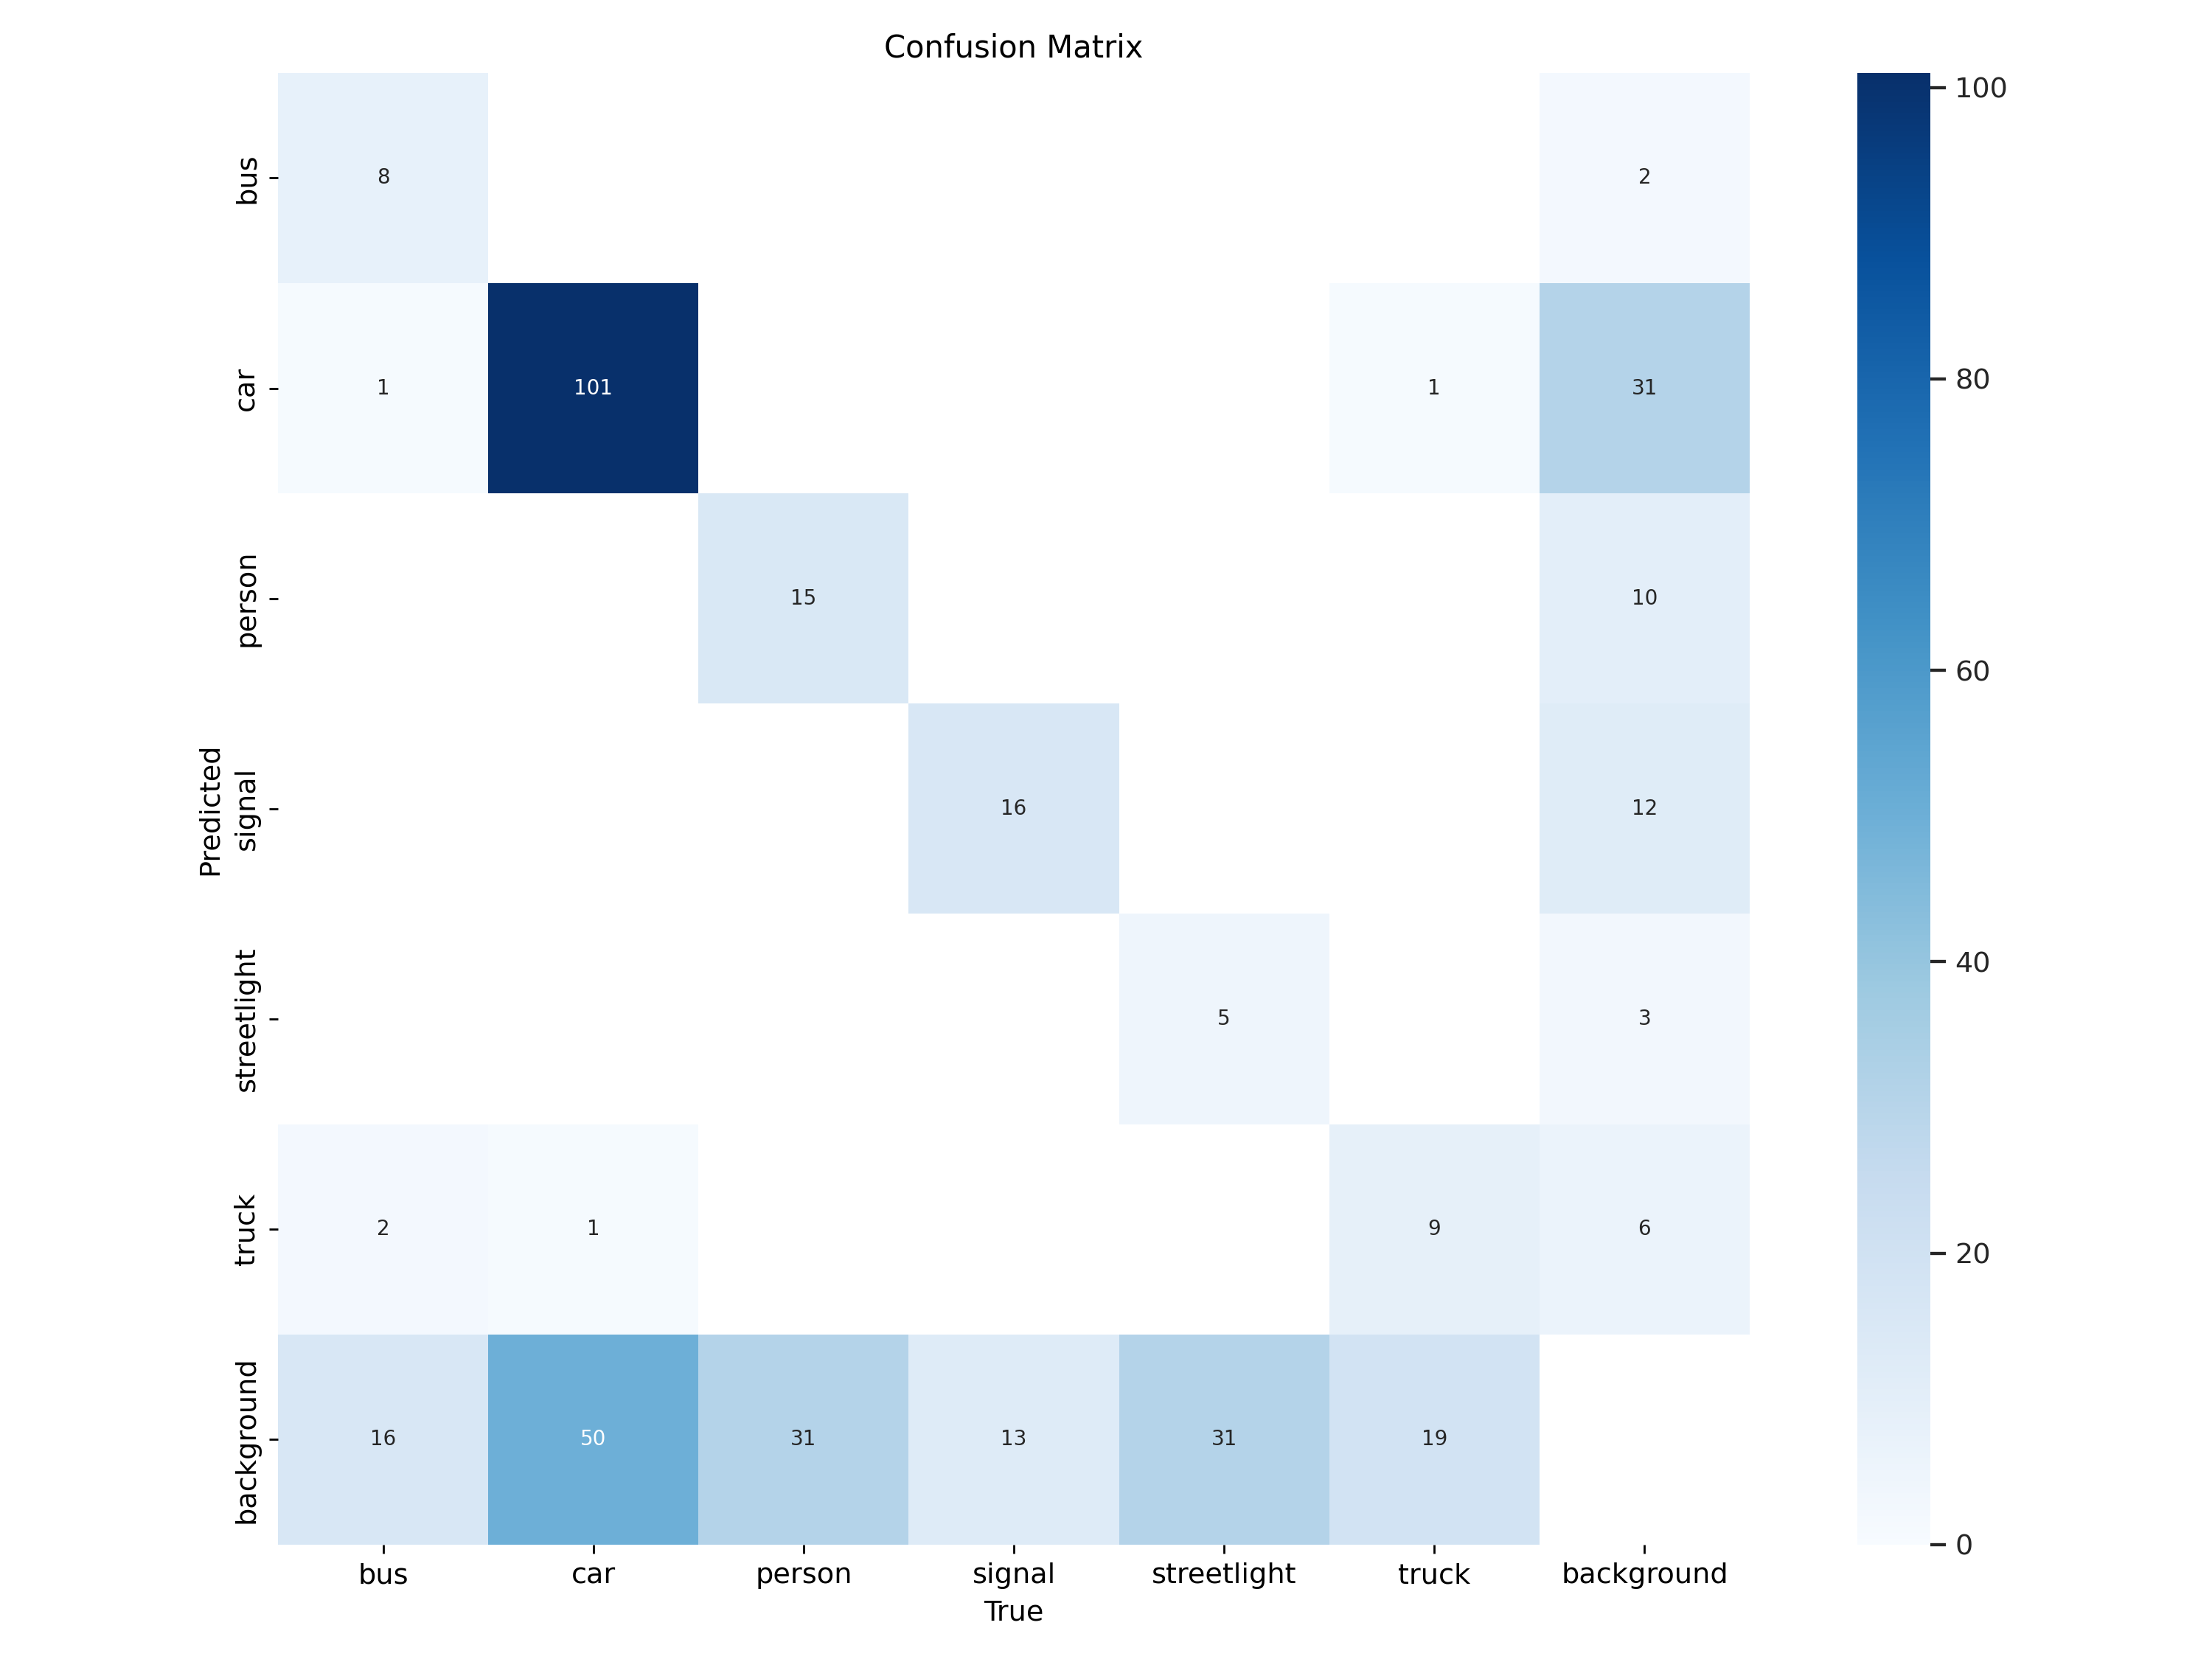

In [ ]:

Image(filename=f'/content/ultralytics/runs/detect/train2/confusion_matrix.png', width=700)

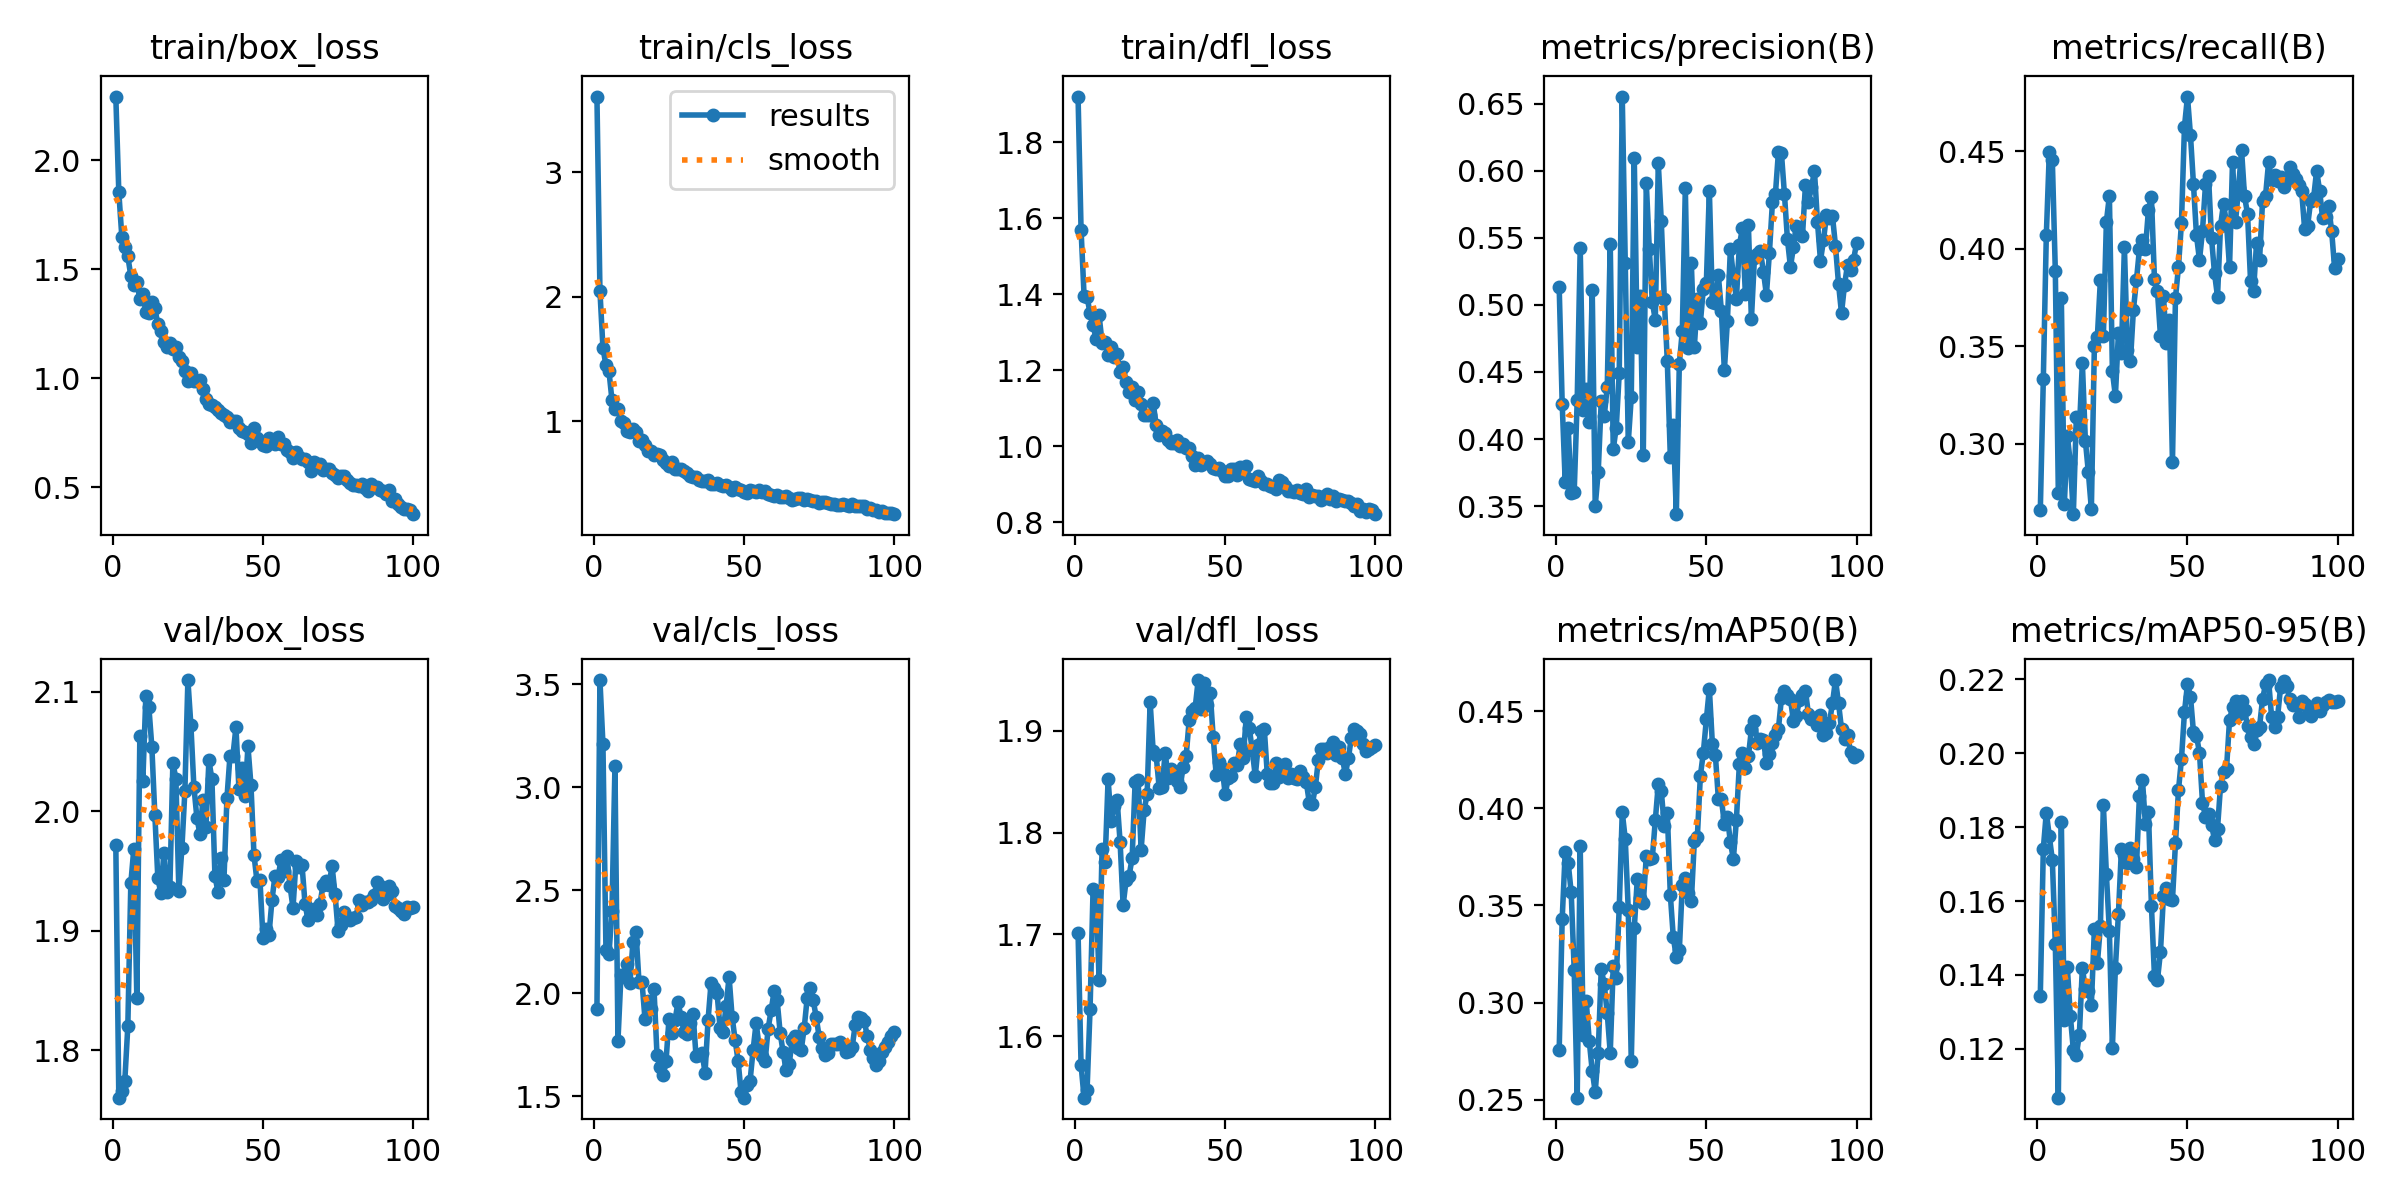

In [ ]:
Image(filename=f'/content/ultralytics/runs/detect/train2/results.png', width=800)

### Validation of model

In [ ]:
# Load a model
model = YOLO('yolov8m.pt')  # load an official model
model = YOLO('/content/ultralytics/runs/detect/train2/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.2.41 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/Car-detection-4/valid/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.81s/it]


                   all         12        319       0.55      0.444      0.459       0.22
                   bus          5         27      0.678       0.37      0.417      0.266
                   car         12        152      0.691      0.704      0.738      0.401
                person          9         46      0.502       0.37      0.382      0.113
                signal          7         29      0.528      0.621      0.565      0.194
           streetlight          6         36      0.454      0.222      0.191     0.0599
                 truck          6         29      0.447      0.379      0.458      0.284
Speed: 0.3ms preprocess, 86.9ms inference, 0.0ms loss, 7.8ms postprocess per image
Results saved to /content/ultralytics/runs/detect/val


array([    0.26635,     0.40115,     0.11274,     0.19435,    0.059925,     0.28352])

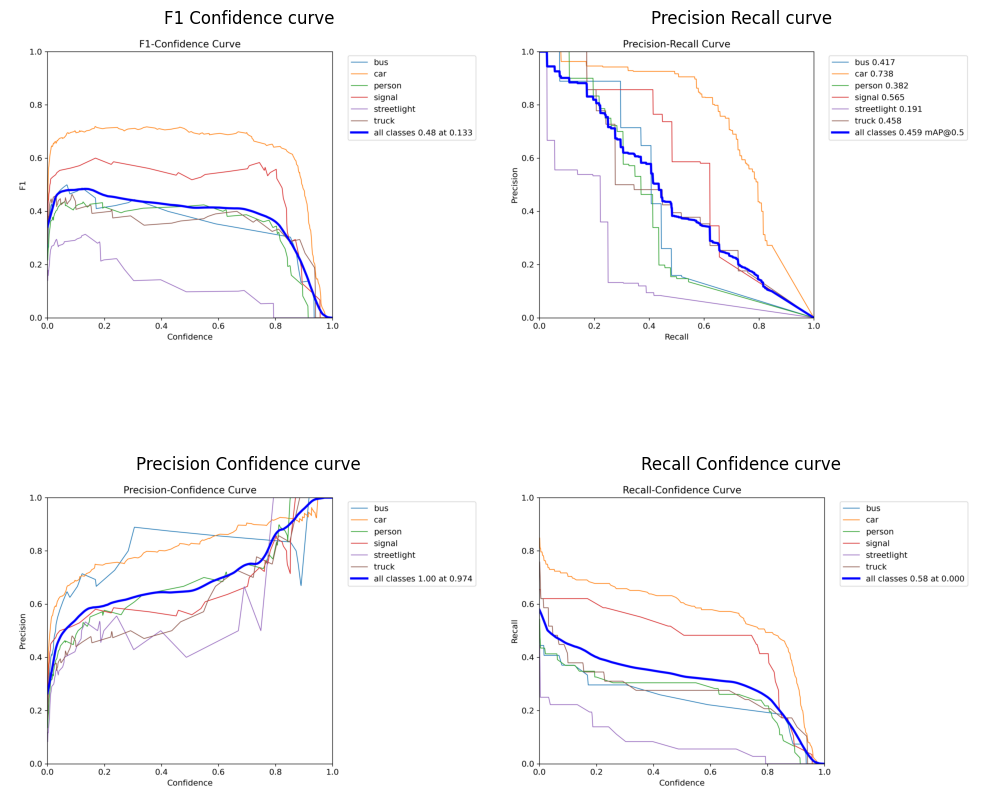

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Directory containing the images
image_dir = '/content/ultralytics/runs/detect/val'

# List of image filenames and corresponding titles
image_files = ['F1_curve.png', 'PR_curve.png', 'P_curve.png', 'R_curve.png']
image_titles = ['F1 Confidence curve', 'Precision Recall curve', 'Precision Confidence curve', 'Recall Confidence curve']

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Loop through image files and titles, and display them in the subplot
for i, (image_file, title) in enumerate(zip(image_files, image_titles)):
    row = i // 2
    col = i % 2
    img_path = os.path.join(image_dir, image_file)
    img = mpimg.imread(img_path)
    axs[row, col].imshow(img)
    axs[row, col].set_title(title)

# Removing axis labels and adjust layout
for ax in axs.flat:
    ax.axis('off')
plt.tight_layout()

# Show the subplot
plt.show()

### Model Testing

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
   return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
#  inference on testing dataset
PATH="/content/ultralytics/runs/detect/train2"
!yolo task=detect mode=predict model='/content/ultralytics/runs/detect/train2/weights/best.pt' save_txt=True conf=0.5 save_conf=True source='/content/Car-detection-4/test/images'


Ultralytics YOLOv8.2.41 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs

image 1/6 /content/Car-detection-4/test/images/New-Project-11_png.rf.a130902d79fea5ac5f6bfa40a70b1e05.jpg: 640x640 5 buss, 15 cars, 2 persons, 2 trucks, 36.5ms
image 2/6 /content/Car-detection-4/test/images/crosswalks-forty-second-street-midtown-manhattan-new-york-city-usa-T9MRRT_jpg.rf.12ce32b2aa29d02f17ff0aafc9372fb5.jpg: 640x640 1 bus, 6 cars, 2 trucks, 36.4ms
image 3/6 /content/Car-detection-4/test/images/istockphoto-1070610194-1024x1024_jpg.rf.0af6c02f8e634a3abe54492067f32ee6.jpg: 640x640 2 persons, 5 signals, 36.3ms
image 4/6 /content/Car-detection-4/test/images/istockphoto-1767349858-1024x1024_jpg.rf.9a8b2f659a8f6392d3a407986cfdc171.jpg: 640x640 1 car, 2 persons, 3 signals, 36.3ms
image 5/6 /content/Car-detection-4/test/images/istockphoto-892646738-1024x1024_jpg.rf.af3ac991e3ebc502636bc142b6273f41.jpg: 640x640 

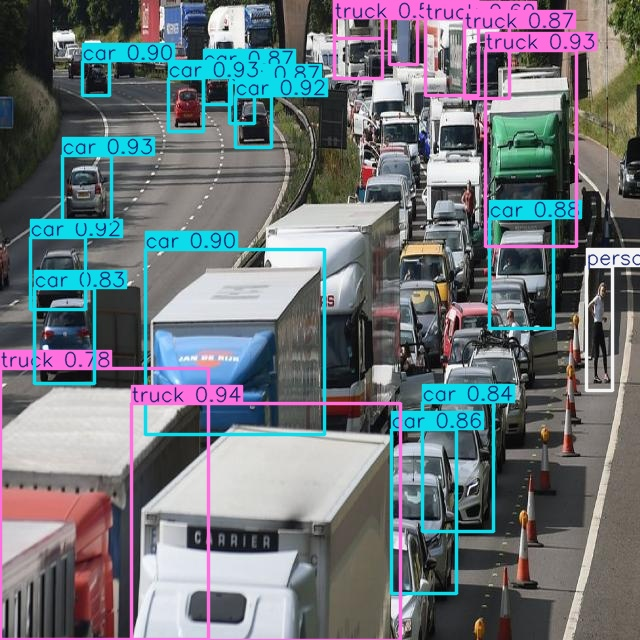

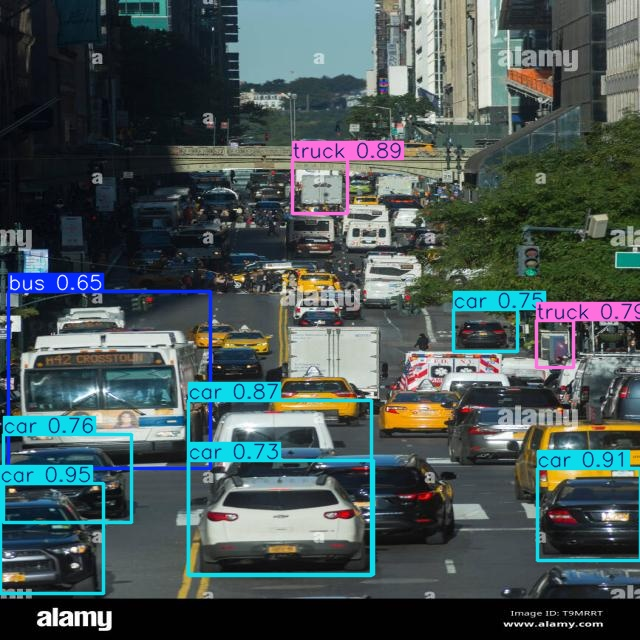

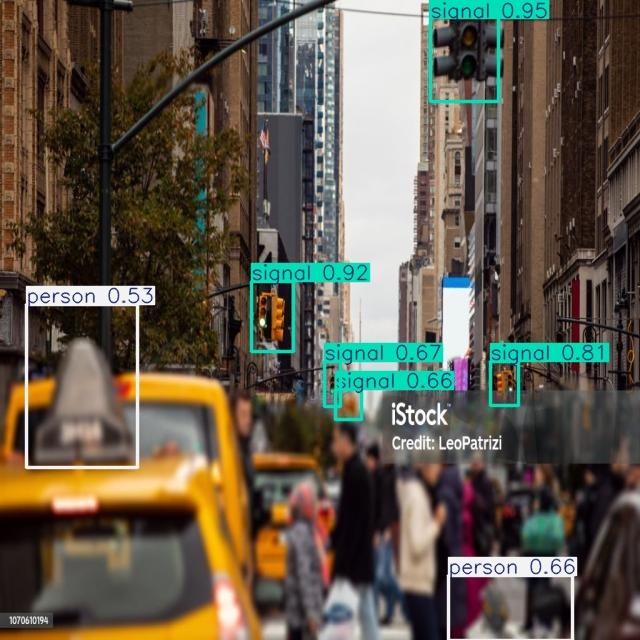

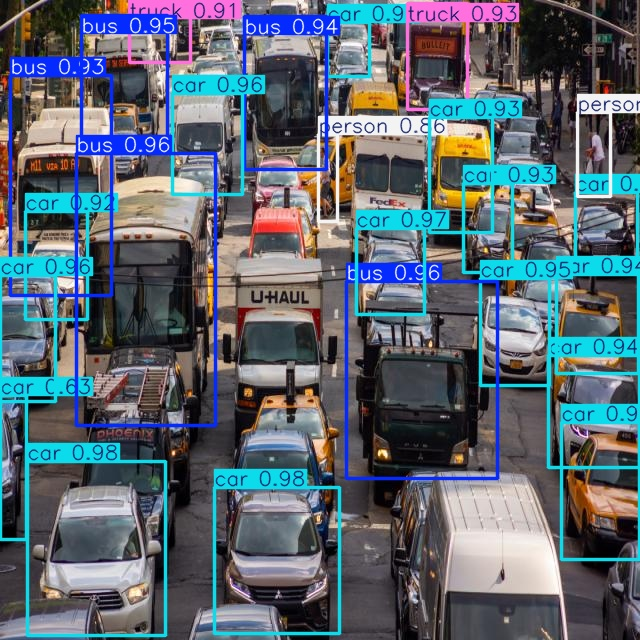

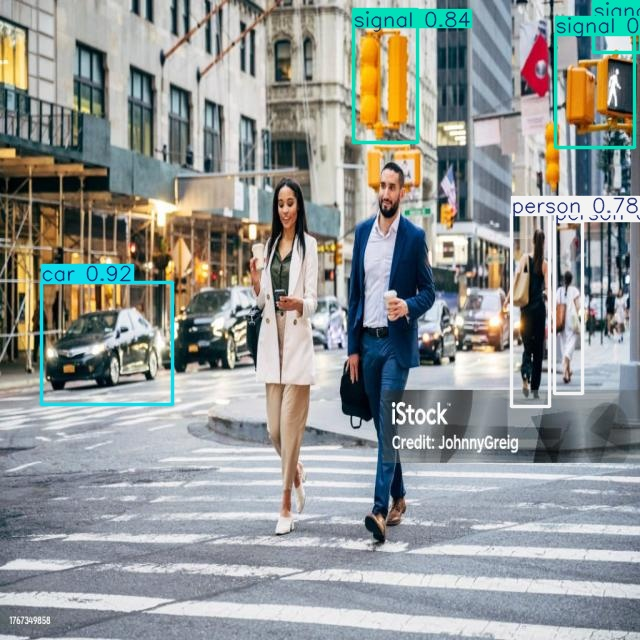

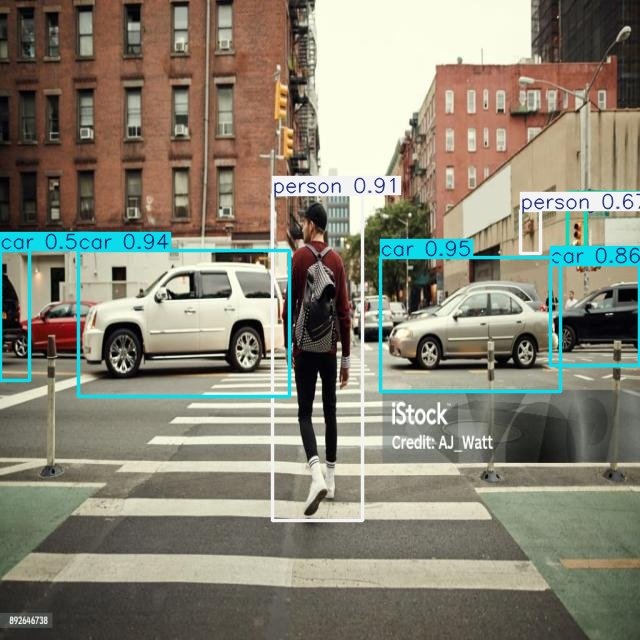

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/ultralytics/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, height = 600))
  print("\n")